# How to Develop Word Embeddings in Python with Gensim
## Develop Word2Vec Embedding

This lab is prepared with the following materials 
1. [How to Develop Word Embeddings in Python with Gensim](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/)

Word2vec is one algorithm for learning a word embedding from a text corpus.

There are two main training algorithms that can be used to learn the embedding from text; they are continuous bag of words (CBOW) and skip grams. The algorithms generally look at a window of words for each target word to provide context and in turn meaning for words. The approach was developed by Tomas Mikolov, formerly at Google and currently at Meta (formally Facebook).

Word2Vec models require a lot of text, e.g. the entire Wikipedia corpus. Nevertheless, we will demonstrate the principles using a small in-memory example of text. Gensim provides the Word2Vec class for working with a Word2Vec model.

Learning a word embedding from text involves loading and organizing the text into sentences and providing them to the constructor of a new Word2Vec() instance. Specifically, each sentence must be tokenized, meaning divided into words and prepared (e.g. perhaps pre-filtered and perhaps converted to a preferred case).

The sentences could be text loaded into memory, or an iterator that progressively loads text, required for very large text corpora.

There are many parameters on this constructor; a few noteworthy arguments you may wish to configure are:

- size: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
- window: (default 5) The maximum distance between a target word and words around the target word.
- min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
- workers: (default 3) The number of threads to use while training.
- sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

In [5]:
# preinstalled in annaconda
# if you encounter errors, upgrade gensim; $>pip install gensim -U

%matplotlib inline

In [6]:
from gensim.models import Word2Vec  # https://radimrehurek.com/gensim/models/word2vec.html
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)  # the number of dimensions of the embedding is 100
# summarize the loaded model
print(model)                              # use CBOW, alpha: The initial learning rate.

Word2Vec<vocab=14, vector_size=100, alpha=0.025>


After the model is trained, it is accessible via the “wv” attribute. This is the actual word vector model in which queries can be made.

For example, you can print the learned vocabulary of tokens (words) as follows:

In [8]:
# summarize vocabulary
words = list(model.wv.key_to_index)
print(words)

['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']


You can review the embedded vector for a specific token as follows:

In [10]:
# access vector for one word
print(model.wv['sentence'])

[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
 -1.5080082e-03  2.46979

Finally, a trained model can then be saved to file by calling the save() function on the word vector model.

By default, the model is saved in a binary format to save space. For example:

In [12]:
# save model
model.save('model.bin')

The saved model can then be loaded again by calling the Word2Vec.load() function. For example:

In [14]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=14, vector_size=100, alpha=0.025>


## Visualize Word Embedding

After you learn word embedding for your text data, it can be nice to explore it with visualization.

You can use classical projection methods to reduce the high-dimensional word vectors to two-dimensional plots and plot them on a graph.

The visualizations can provide a qualitative diagnostic for your learned model.

In [17]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)

We can create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class as follows.

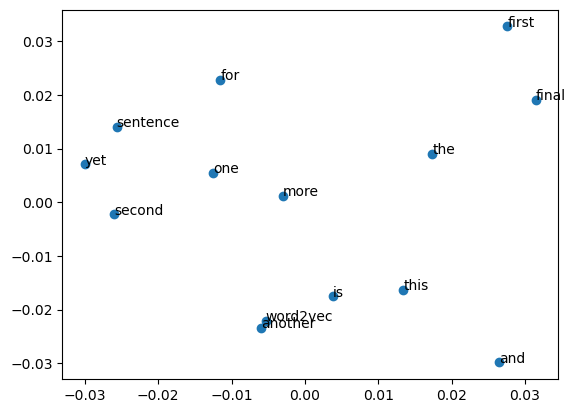

In [19]:
# fit a 2d PCA model to the vectors
X = model.wv[model.wv.key_to_index]  # retrieve all of the vectors from a trained model
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1])) # annotate the points on the graph with the words themselves. 
pyplot.show()

Running the example creates a scatter plot with the dots annotated with the words.

It is hard to pull much meaning out of the graph given such a tiny corpus was used to fit the model.

## Load Google’s Word2Vec Embedding

Training your own word vectors may be the best approach for a given NLP problem. But it can take a long time, a fast computer with a lot of RAM and disk space, and perhaps some expertise in finessing the input data and training algorithm.

An alternative is to simply use an existing pre-trained word embedding. Along with the paper and code for word2vec, Google also published a pre-trained word2vec model on the Word2Vec Google Code Project.

A pre-trained model is nothing more than a file containing tokens and their associated word vectors. The pre-trained Google word2vec model was trained on Google news data (about 100 billion words); it <b>contains 3 million words and phrases and was fit using 300-dimensional word vectors</b>. 

It is a 1.53 Gigabytes file, GoogleNews-vectors-negative300.bin.gz. Unzipped, the binary file (GoogleNews-vectors-negative300.bin) is 3.4 Gigabytes. <b>Download the file from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g on the word2vec website https://code.google.com/archive/p/word2vec/<b>

The Gensim library provides tools to load this file. Specifically, you can call the KeyedVectors.load_word2vec_format() function to load this model into memory, for example:

In [23]:
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

Running the example loads the Google pre-trained word2vec model and then calculates the (king – man) + woman = ? operation on the word vectors for those words.

The answer, as we would expect, is queen.

In [25]:
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118193507194519)]


In [26]:
# calculate: (doctor - man) + woman = ?
result = model.most_similar(positive=['woman', 'doctor'], negative=['man'], topn=10)
print(result)

[('gynecologist', 0.7093892097473145), ('nurse', 0.647728681564331), ('doctors', 0.6471461653709412), ('physician', 0.6438996195793152), ('pediatrician', 0.6249487996101379), ('nurse_practitioner', 0.6218312978744507), ('obstetrician', 0.6072015166282654), ('ob_gyn', 0.5986713171005249), ('midwife', 0.5927063226699829), ('dermatologist', 0.5739566683769226)]


In [27]:
# calculate: (paris - france) + italy = ? ; note that words are case sensitive.
result = model.most_similar(positive=['PARIS', 'ITALY'], negative=['FRANCE'], topn=5)
print(result)

[('ROME', 0.747753918170929), ('MILAN_Italy', 0.6937424540519714), ('MILAN', 0.6922828555107117), ('ROME_AFP', 0.6154903769493103), ('BERLIN', 0.6132031679153442)]


In [28]:
import logging
# enable logging.INFO for displaying accuracy results
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [29]:
model.evaluate_word_analogies('data_etc/questions-words.txt') # take around 10 minutes

2025-02-23 17:23:12,561 : INFO : Evaluating word analogies for top 300000 words in the model on data_etc/questions-words.txt
2025-02-23 17:23:29,987 : INFO : capital-common-countries: 83.2% (421/506)
2025-02-23 17:25:50,934 : INFO : capital-world: 81.3% (3552/4368)
2025-02-23 17:26:16,327 : INFO : currency: 28.5% (230/808)
2025-02-23 17:27:34,025 : INFO : city-in-state: 72.1% (1779/2467)
2025-02-23 17:27:50,133 : INFO : family: 86.2% (436/506)
2025-02-23 17:28:21,949 : INFO : gram1-adjective-to-adverb: 29.2% (290/992)
2025-02-23 17:28:47,756 : INFO : gram2-opposite: 43.5% (353/812)
2025-02-23 17:29:29,445 : INFO : gram3-comparative: 91.3% (1216/1332)
2025-02-23 17:30:05,049 : INFO : gram4-superlative: 88.0% (987/1122)
2025-02-23 17:30:38,273 : INFO : gram5-present-participle: 78.5% (829/1056)
2025-02-23 17:31:28,473 : INFO : gram6-nationality-adjective: 90.2% (1442/1599)
2025-02-23 17:32:17,839 : INFO : gram7-past-tense: 65.4% (1020/1560)
2025-02-23 17:33:00,721 : INFO : gram8-plural: 

(0.7401448525607863,
 [{'section': 'capital-common-countries',
   'correct': [('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'),
    ('ATHENS', 'GREECE', 'BEIJING', 'CHINA'),
    ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
    ('ATHENS', 'GREECE', 'BERN', 'SWITZERLAND'),
    ('ATHENS', 'GREECE', 'CAIRO', 'EGYPT'),
    ('ATHENS', 'GREECE', 'CANBERRA', 'AUSTRALIA'),
    ('ATHENS', 'GREECE', 'HAVANA', 'CUBA'),
    ('ATHENS', 'GREECE', 'HELSINKI', 'FINLAND'),
    ('ATHENS', 'GREECE', 'ISLAMABAD', 'PAKISTAN'),
    ('ATHENS', 'GREECE', 'MADRID', 'SPAIN'),
    ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
    ('ATHENS', 'GREECE', 'OSLO', 'NORWAY'),
    ('ATHENS', 'GREECE', 'OTTAWA', 'CANADA'),
    ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'),
    ('ATHENS', 'GREECE', 'ROME', 'ITALY'),
    ('ATHENS', 'GREECE', 'STOCKHOLM', 'SWEDEN'),
    ('ATHENS', 'GREECE', 'TEHRAN', 'IRAN'),
    ('ATHENS', 'GREECE', 'TOKYO', 'JAPAN'),
    ('BAGHDAD', 'IRAQ', 'BANGKOK', 'THAILAND'),
    ('BAGHDAD', 'IRAQ', 'BEIJING', 'CHINA'

In [30]:
logging.disable(logging.INFO) # disable logging.INFO

## Load Stanford’s GloVe Embedding

Stanford researchers also have their own word embedding algorithm like word2vec called Global Vectors for Word Representation, or GloVe for short.

We won’t get into the details of the differences between word2vec and GloVe here, but generally, NLP practitioners seem to prefer GloVe at the moment based on results.

Like word2vec, the GloVe researchers also provide pre-trained word vectors, in this case, a great selection to choose from.

You can download the GloVe pre-trained word vectors and load them easily with gensim.

<b>The first step is to convert the GloVe file format to the word2vec file format.</b> The only difference is the addition of a small header line. This can be done by calling the load_word2vec_format() function with no_header=True. For example:

In [33]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B/glove.6B.100d.txt'
model = KeyedVectors.load_word2vec_format(filename, binary=False, no_header=True)

Now we can load it and perform the same (king – man) + woman = ? test as in the previous section. Note that the converted file is ASCII format, not binary, so we set binary=False when loading.

In [35]:
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698541283607483)]


In [36]:
# calculate: (paris - france) + italy = ? ; note that words are converted to lowercase.
result = model.most_similar(positive=['paris', 'italy'], negative=['france'], topn=1)
print(result)

[('rome', 0.8189547061920166)]


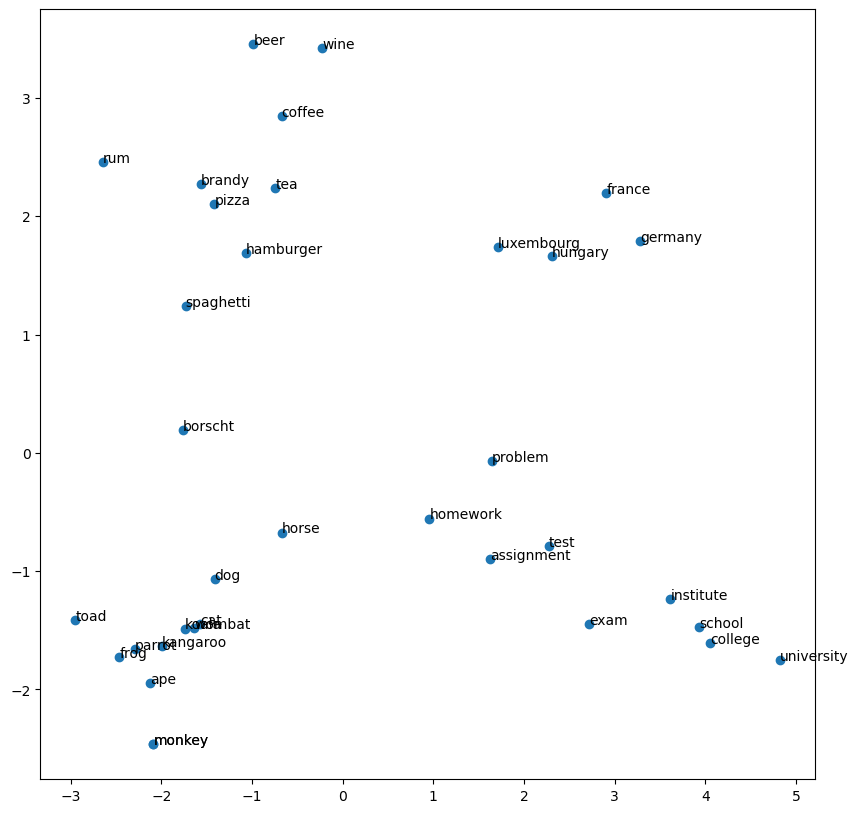

In [37]:
# fit a 2d PCA model to the vectors
import numpy as np
pyplot.rcParams["figure.figsize"] = (10,10)
words = ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'spaghetti', 'borscht', 'hamburger',
         'pizza', 'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'frog', 'toad', 'monkey',
        'ape', 'kangaroo', 'wombat', 'france', 'germany', 'hungary', 'luxembourg', 'homework',
        'assignment', 'problem', 'exam', 'test', 'school', 'college', 'university', 'institute']
X = np.array([model[w] for w in words]) # retrieve all of the vectors in words from the model
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1])) # annotate the points on the graph with the words themselves. 
pyplot.show()